In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
OXALAC03_FIT_DATA_PATH = "./data/oxalac03/1_fit_dma/relative_energies.csv"
OXALAC03_CSP_NNP_DATA_PATH = "./data/oxalac03/2_csp_minima_nnp/relative_energies.csv"
OXALAC03_OTF_NNP_DATA_PATH = "./data/oxalac03/3_on_the_fly_nnp/relative_energies.csv"
OXALAC04_FIT_DATA_PATH = "./data/oxalac04/1_fit_dma/relative_energies.csv"
OXALAC04_CSP_NNP_DATA_PATH = "./data/oxalac04/2_csp_minima_nnp/relative_energies.csv"
OXALAC04_OTF_NNP_DATA_PATH  = "./data/oxalac04/3_on_the_fly_nnp/relative_energies.csv"

data_files = [
    OXALAC03_FIT_DATA_PATH, 
    OXALAC03_CSP_NNP_DATA_PATH, 
    OXALAC03_OTF_NNP_DATA_PATH,
    OXALAC04_FIT_DATA_PATH,
    OXALAC04_CSP_NNP_DATA_PATH,
    OXALAC04_OTF_NNP_DATA_PATH,
]

oxalac03_files = data_files[:3]
oxalac04_files = data_files[3:]

In [3]:
SMALL_SIZE = 12.5
MEDIUM_SIZE = 18
BIGGER_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

plt.rcParams.update({'font.sans-serif':'Helvetica'})

In [4]:
def plot_correlation(csv_fpath, fig, ax, xyline=True, calc_errors=True, **kwargs):
    df = pd.read_csv(csv_fpath)
    
    x_column = kwargs.get("column1", "rel_PBE_energy")
    y_column = kwargs.get("column2", "rel_energy")
    
    x = np.array(df.loc[:, x_column])
    y = np.array(df.loc[:, y_column])
    
    
    ax.scatter(
        x, y, 
        facecolors="k", 
        edgecolors="k", 
        alpha=0.5
    )
    
    if kwargs.get("lims", None) is not None:
        ax_min, ax_max = kwargs.get("lims")
        ax.set_xlim(xmin=ax_min, xmax=ax_max)
        ax.set_ylim(ymin=ax_min, ymax=ax_max)
    
    
    if xyline:
        min_val = min(np.nanmin(x), np.nanmin(y))
        max_val = max(np.nanmax(x), np.nanmax(y))
        ax.axline((min_val, min_val), slope=1, c="k", alpha=0.8)
        
    if calc_errors:
        mae, rmse = calc_mae_rmse(x, y)
        ax.annotate(
            f"MAE = {mae:.2f}\nRMSE = {rmse:.2f}", 
            (0.03, 0.88), 
            xycoords="axes fraction",
            fontsize=12,
        )

    

In [5]:
def calc_mae_rmse(x, y):
    from sklearn.metrics import mean_absolute_error, mean_squared_error
    import math
    
    x = x[~np.isnan(x)]
    y = y[~np.isnan(y)]
    mae = mean_absolute_error(x, y)
    rmse = math.sqrt(mean_squared_error(x, y))
    
    return mae, rmse

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


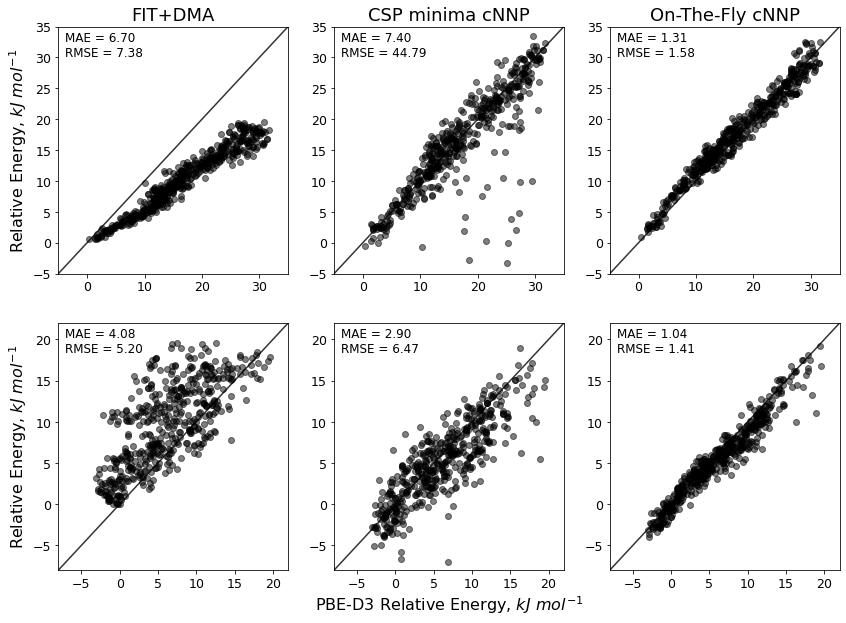

In [6]:
fig, axes = plt.subplots(
    nrows=2,
    ncols=3,
    figsize=(14,10),
)

for i, csv in enumerate(oxalac03_files):
    plot_correlation(csv, fig, axes[0][i], lims=(-5, 35))
    
for i, csv in enumerate(oxalac04_files):
    plot_correlation(csv, fig, axes[1][i], lims=(-8, 22))

axes[0][0].set_ylabel('Relative Energy, $kJ\ mol^{-1}$', fontsize=16)
axes[1][0].set_ylabel('Relative Energy, $kJ\ mol^{-1}$', fontsize=16)
axes[1][1].set_xlabel('PBE-D3 Relative Energy, $kJ\ mol^{-1}$', fontsize=16)

axes[0][0].set_title("FIT+DMA")
axes[0][1].set_title("CSP minima cNNP")
axes[0][2].set_title("On-The-Fly cNNP")

fig.set_facecolor('white')


In [7]:
# fig.savefig(
#     "perturbed_correlation.png",
#     bbox_inches="tight",
#     #transparent=True,
#     dpi=400,
# )